MODEL TRAINING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# model Packages 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv("./data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
y = df["math score"]
X = df.drop(columns= ["math score"] , axis=1)


In [6]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y 

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [8]:
# create column transformer for with 3 type of transformers 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder , StandardScaler

numerical_features = X.select_dtypes(exclude=["object"]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

oh_transformer = OneHotEncoder()
numeric_transformer  = StandardScaler()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', oh_transformer, categorical_features)
    ])


In [9]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [10]:
X

array([[ 0.19399858,  0.39149181,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.42747598,  1.31326868,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60515772,  0.58901542,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  1.        , ...,  0.        ,
         0.        ,  1.        ]], shape=(1000, 19))

In [11]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
def evaluate_model(true , predicted):
    mae = mean_absolute_error(true , predicted)
    mse = mean_squared_error(true , predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true , predicted)
    return mae , mse , rmse , r2_square

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "XGBoost Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False)
}

model_report = {}

for model_name, model in models.items():
    # training the model
    model.fit(X_train, y_train)
    
    # predicting the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluating the model
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

    print("-----------------------------------------")
    print("--------------------- {0} ---------------------".format(model_name))
    print("---------- TRAINING METRICS ----------")
    print("Train MAE: ", train_mae)
    print("Train MSE: ", train_mse)
    print("Train RMSE: ", train_rmse)
    print("Train R2: ", train_r2)
    print("---------- TESTING METRICS ----------")
    print("Test MAE: ", test_mae)
    print("Test MSE: ", test_mse)
    print("Test RMSE: ", test_rmse)
    print("Test R2: ", test_r2)
    print("-----------------------------------------")
    print("\n\n")
    
    model_report[model_name] = {
        "Train MAE": train_mae,
        "Train MSE": train_mse,
        "Train RMSE": train_rmse,
        "Train R2": train_r2,
        "Test MAE": test_mae,
        "Test MSE": test_mse,
        "Test RMSE": test_rmse,
        "Test R2": test_r2
    }


-----------------------------------------
--------------------- Linear Regression ---------------------
---------- TRAINING METRICS ----------
Train MAE:  4.266711846071956
Train MSE:  28.33487038064859
Train RMSE:  5.323050852720514
Train R2:  0.8743172040139593
---------- TESTING METRICS ----------
Test MAE:  4.214763142474852
Test MSE:  29.095169866715487
Test RMSE:  5.393993869732843
Test R2:  0.8804332983749565
-----------------------------------------



-----------------------------------------
--------------------- Ridge Regression ---------------------
---------- TRAINING METRICS ----------
Train MAE:  4.264987823725977
Train MSE:  28.337788233082456
Train RMSE:  5.323324922741656
Train R2:  0.8743042615212908
---------- TESTING METRICS ----------
Test MAE:  4.211100688014261
Test MSE:  29.05627219234826
Test RMSE:  5.390387016935636
Test R2:  0.880593148502874
-----------------------------------------



-----------------------------------------
--------------------- Lasso Re

In [15]:
model_report_df = pd.DataFrame(model_report).T
model_report_df.sort_values(by="Test R2", ascending=False)
model_report_df

,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2
Linear Regression,4.266712,28.334870,5.323051,0.874317,4.214763,29.095170,5.393994,0.880433
Ridge Regression,4.264988,28.337788,5.323325,0.874304,4.211101,29.056272,5.390387,0.880593
Lasso Regression,5.206296,43.478298,6.593808,0.807147,5.157879,42.506332,6.519688,0.825320
Decision Tree,0.018750,0.078125,0.279508,0.999653,6.165000,59.735000,7.728842,0.754519
Random Forest,1.829778,5.342043,2.311286,0.976305,4.619576,35.321401,5.943181,0.854847
Gradient Boosting,3.722632,21.408569,4.626939,0.905040,4.315982,31.164651,5.582531,0.871929
Support Vector Regressor,4.869189,43.257024,6.577007,0.808128,5.401539,66.042005,8.126623,0.728600
K-Neighbors Regressor,4.516500,32.633900,5.712609,0.855248,5.619000,52.617000,7.253758,0.783770
XGBoost Regressor,0.687467,1.014616,1.007282,0.995500,5.103630,43.503922,6.595750,0.821221
CatBoost Regressor,2.405394,9.257805,3.042664,0.958936,4.612532,36.103658,6.008632,0.851632


In [16]:
# lets use Linear Regressior 
final_model = LinearRegression()
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

evaluate_model(y_test, y_pred)

(4.214763142474852,
 29.095169866715487,
 np.float64(5.393993869732843),
 0.8804332983749565)

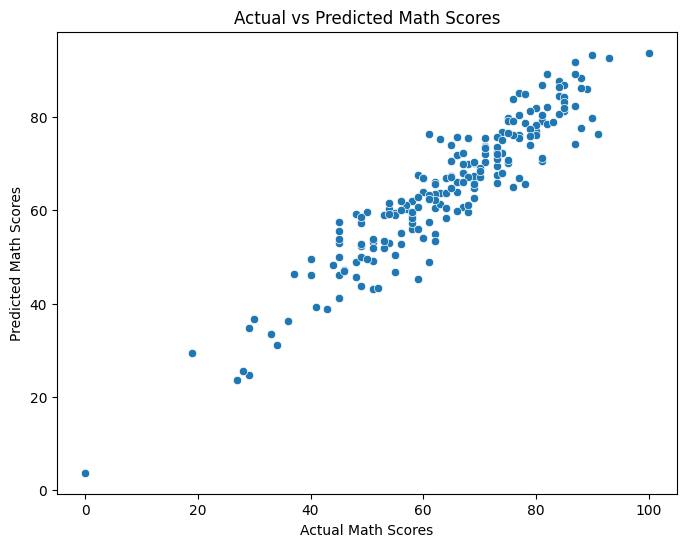

In [19]:
# plot graph for data 
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores")
plt.show()

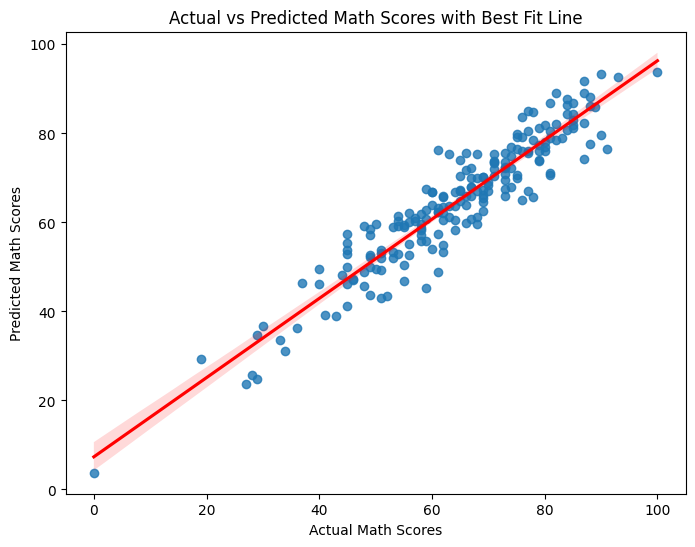

In [ ]:
# lets show best fit line 
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color":"red"})
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores with Best Fit Line")
plt.show()

In [28]:
# Evaluation difference DF

# // actual value predict value and difference 

# Convert both to Series with identical positional indices
y_test_series = pd.Series(y_test).reset_index(drop=True)
y_pred_series = pd.Series(y_pred).reset_index(drop=True)

difference = y_test_series - y_pred_series

evaluated_difference = pd.DataFrame({
    "Difference": difference,
    "Actual Value": y_test_series,
    "Predicted Value": y_pred_series
})

evaluated_difference.head()

,Difference,Actual Value,Predicted Value
0,14.612030,91,76.387970
1,-5.885970,53,58.885970
2,3.009735,80,76.990265
3,-2.851804,74,76.851804
4,-3.627378,84,87.627378
